### End to end project timeseries analysis and forecasting using Python 

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

In [108]:
import warnings  
import itertools 
import numpy as np 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd 
import statsmodels.api as sm 
import matplotlib


In [109]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### importing the dataset superstore

In [111]:
df = pd.read_excel('Sample - Superstore.xls')
furniture = df.loc[df['Category'] == 'Furniture']

#### check the data range , since it's time series data

In [112]:
# furniture = df[df['Category'] =='Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()


(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#### dropping the unecessart clumn we diont need

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date',
        'Ship Mode', 'Customer ID', 'Customer Name',
        'Segment', 'Country', 'City', 'State', 'Postal Code',
        'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols,axis=1,inplace=True)

#### sorting the data based on date 

In [7]:
furniture= furniture.sort_values('Order Date')


### groupby based on order date

In [116]:
furniture= furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [117]:
furniture = furniture.set_index('Order Date')

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

#### only shows the year-specific data

for example we display the data on year 2017 and get the mean

In [119]:
y = (furniture['Sales'].resample('MS').mean())
y['2014':'2014']

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
Freq: MS, Name: Sales, dtype: float64

### visualizing the sales time series Data that  has been indexed by time(monthly)

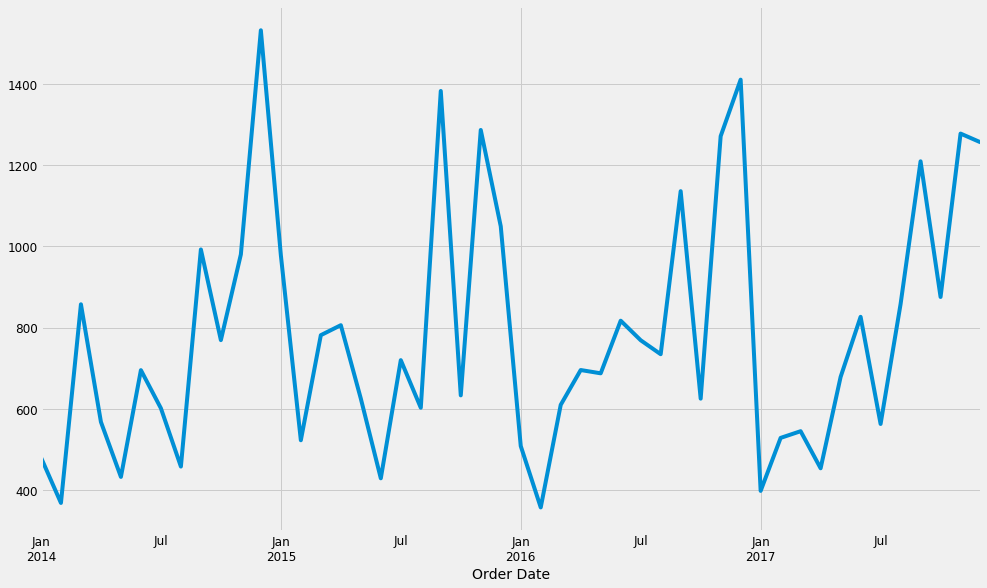

In [121]:
y.plot(kind= 'line', figsize= (15,9))
plt.show()

some distinguishable patterns appear when we plt the data. the time-series has seasonality pattern , such as sales are aways low at the beginning of the year and high at the and of the year. there is always and upward trend within any single year  with couple of low months in the mid-year

we can also visualiza the data using called time series decomposition that allowes us to decompose our time series into three distinct components

#### 1. Trend 
#### 2. Seasonality 
#### 3. Noise

In [122]:
from pylab import rcParams

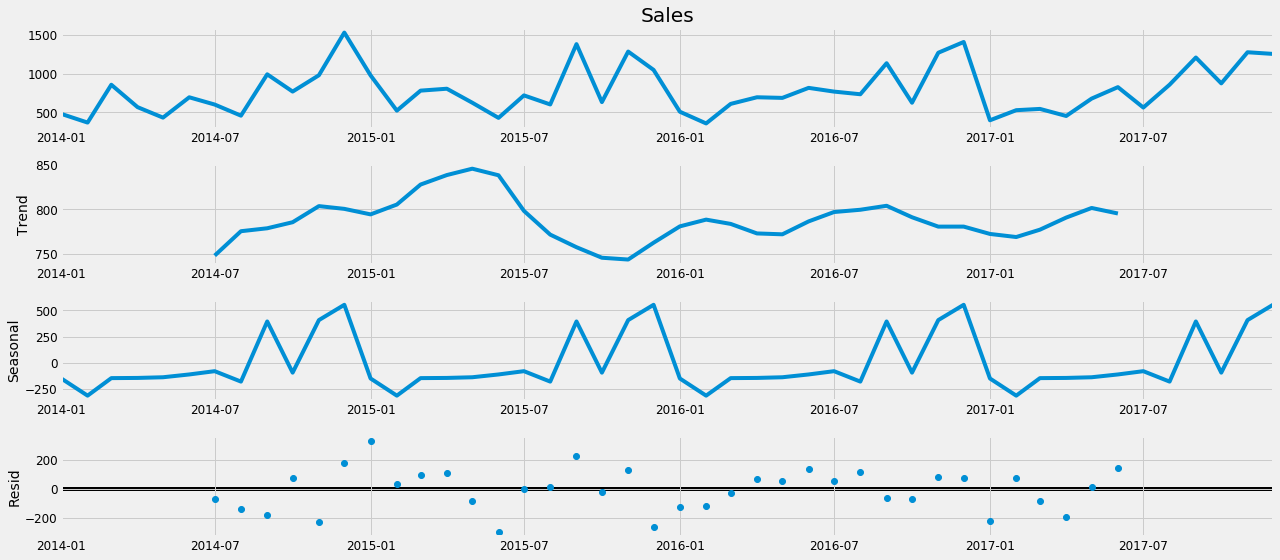

In [123]:
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig= decomposition.plot()
plt.show()

the plot shows information related to the trend, it means it is non-stationary data. while we can also observe the seasonality trend of our data as well as the residual that from the look doesn't really fluctuative. 

#### time series forecasting with ARIMA

we are going to apply one of the most commonly used mehod for time-series forecasting , known as ARIMA, which stands for 
AutoRegressive
Integrated
Moving
Average

ARIMA models are denoted with the notation ARIMA(p,d,q) . there three parameters account for seasonality , trend  and noise in data

In [49]:
p=d=q = range(0,2)

In [124]:
pdq= list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2],12) for x in list(itertools.product(p,d,q))]

In [125]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

now the step for parameter selection for our furniture's sales ARUNA Time Series Model. Our Goal here is to use a grid search to find the best and optimal parameters that yields the best performance for our model

#### now this all the fun begins 

In [126]:
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try: 
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results= mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1576.7324642473277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793649
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1478.1277236759956
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803011644
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758104
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2786.7230874852653
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091505
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673295
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.59412606125284
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2768.427220528199
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468674
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255764352875
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1378.5486237111134


the paramter tunning yields that the lowes AIC value is 297.78 from
SARIMAX (1,1,1)x(1,1,0,12)

it means that the seasonal is 12 (12 months so it's yearly seasonal data)

### fitting the ARIMA Model

In [127]:
model= sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False
                                )
results = model.fit()


#### the model summary of ARIMA

In [128]:
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


### full summary of ARIMA Model

In [129]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -144.894
Date:                             Fri, 18 Dec 2020   AIC                            297.788
Time:                                     15:13:59   BIC                            302.152
Sample:                                 01-01-2014   HQIC                           298.816
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      

building model is importance, but validating and investigating our result performance, accuracy and reliability is beyond that. it tooks deep knowloedge and mathematical understanding so the model will be "explainable" and understandable


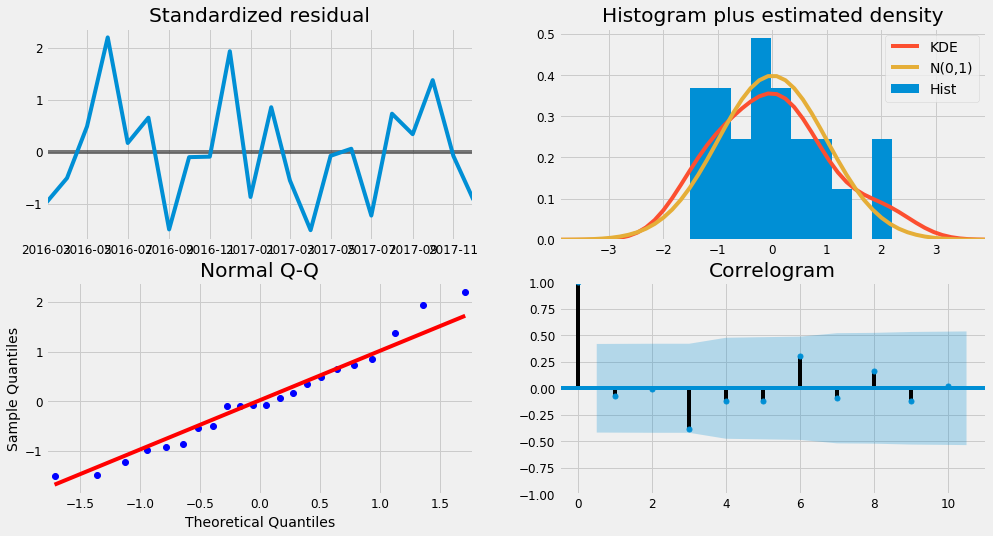

In [130]:
results.plot_diagnostics(figsize= (15,8))
plt.show()

the result shows the model diagnostics suggest the model residuals are near normally distributied

## Validating Forecasts

to help us understand the accuracy of forecast model, we might need to compare the predicted sales to real sales of the time series, and we set forecast to start at 2017-01-01 to the end of the data

meaning using our tail data as the "test" to validate the result

In [131]:
pred= results.get_prediction(start= pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()

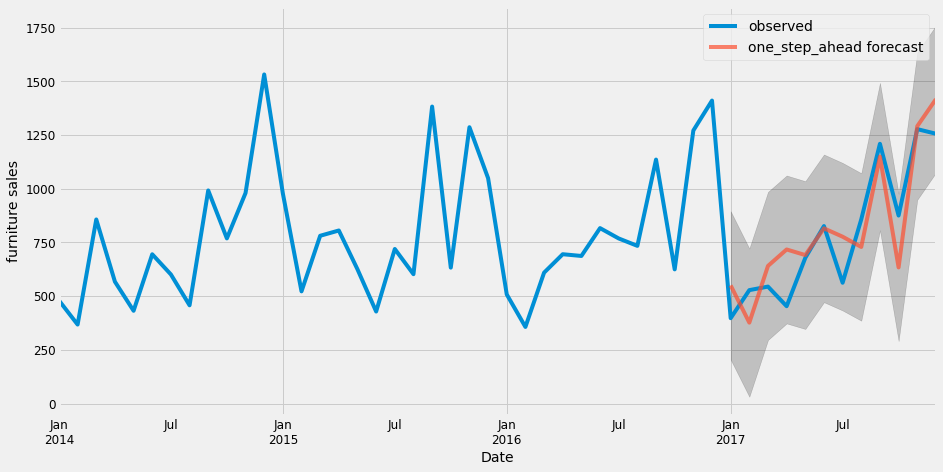

In [132]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='one_step_ahead forecast',
                        alpha= .7, figsize= (14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('furniture sales')
plt.legend()
plt.show()

from the plot shows the slight different on the data from the forecast. overall, it aligns pretty well, showing the upward- and downward trend are pretty much alligned. 

In [133]:
y_forecasted= pred.predicted_mean
y_truth = y['2017-01-01':]

### the mean squared error of the forecast is 5911.26

In [134]:
mse= ((y_forecasted-y_truth)**2).mean()
mse= round(mse,2)
mse

22993.57

### the root mean squared error of the forecast is the squareroot of the MSE 76.88


In [135]:
RMSE = np.sqrt(mse)
print(round(RMSE,2))

151.64


in statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.
Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

## producing and Visualizing Forecasts

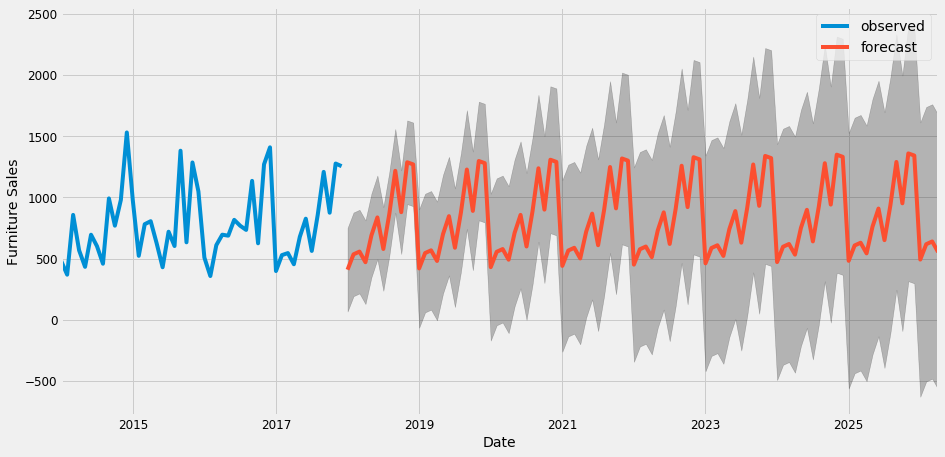

In [136]:
pred_uc= results.get_forecast(steps= 100)
pred_ci= pred_uc.conf_int()


ax= y.plot(label= 'observed', figsize = (14,7))
pred_uc.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Time Series of Furniture Vs OFfice Supplies